In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_16924\3213813731.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [17]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [18]:
df=pd.read_csv('Dhaka Rent.csv',sep=';')

In [19]:
df.head(10)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [20]:
df.shape

(60, 2)

In [21]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0.5, 1.0, 'Dhaka city house rent')

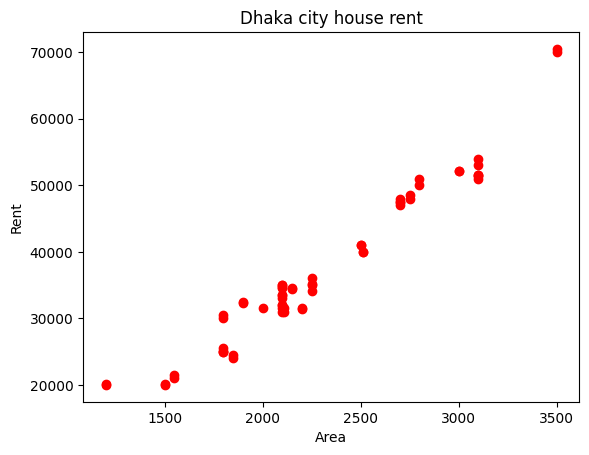

In [22]:
plt.scatter(df['area'] , df['rent'],color='red')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka city house rent')

In [23]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


raw code
1.slope m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2.Intercept, c = ȳ - m * x̄

In [24]:
x=df['area']
y=df['rent']

In [25]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [26]:
mean_x

2289.0

In [27]:
mean_y

37269.166666666664

In [28]:
dev_x= x - mean_x

In [29]:
dev_y= y - mean_y

In [30]:
coefficient_m = np.sum(dev_x*dev_y)/np.sum(dev_x**2)
coefficient_m

21.292661473611954

In [31]:
intercept =mean_y - (coefficient_m * mean_x)
intercept

-11469.7354464311

In [32]:
(coefficient_m*2100)+intercept

33244.85364815401

Sklearn

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg= LinearRegression()

In [47]:
reg.fit(df[['area']], df[['rent']])

LinearRegression()

In [48]:
reg.coef_

array([[21.29266147]])

In [49]:
coefficient_m

21.292661473611954

In [50]:
reg.intercept_

array([-11469.73544643])

In [51]:
intercept

-11469.7354464311

In [52]:
reg.predict([[2000]])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [53]:
pred=reg.predict(df[['area']])
pred

array([[31115.58750079],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],
       [34309.48672183],
       [33244.85364815],
       [33244.85364815],
       [41974.84485233],
       [36438.7528692 ],
       [54537.51512177],
       [26857.05520607],
       [21533.88983767],
       [26857.05520607],
       [46020.45053232],
       [33457.78026289],
       [33244.85364815],
       [63054.57971121],
       [14081.4583219 ],
       [48149.71667968],
       [54537.51512177],
       [47085.083606  ],
       [26857.05520607],
       [35374.11979552],
       [54537.51512177],
       [33244.85364815],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],


In [55]:
df['pred']= reg.predict(df[['area']])
df.head()
                          

,area,rent,pred
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


Text(0.5, 1.0, 'Dhaka city house rent')

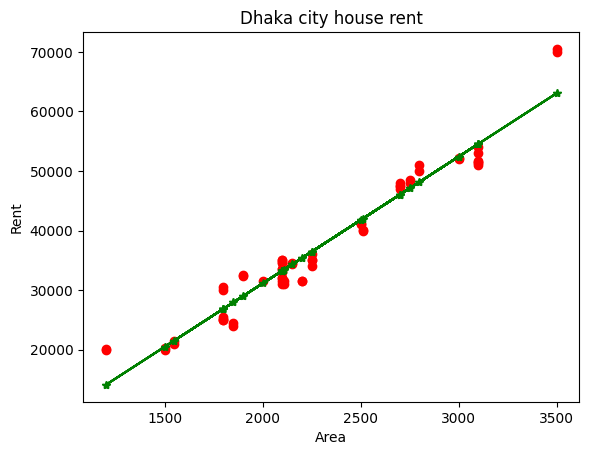

In [60]:
plt.plot(df[['area']],reg.predict(df[['area']]), marker='*',color='green')
plt.scatter(df['area'] , df['rent'],color='red')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka city house rent')

MSE

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
MSE=mean_squared_error(df['rent'], df['pred'])
MSE

6778077.204095561

MAE

In [70]:
MAE=mean_absolute_error(df['rent'], df['pred'])
MAE

2009.8695093576282

In [68]:
import math
math.sqrt(mse)

2603.474064417689